In [1]:
import pandas as pd
import numpy as np

In [16]:
# Load Clean csv data
M5 = pd.read_csv('SeatingClean_M_5_S2.csv')
M4 = pd.read_csv('SeatingClean_M_4_S2.csv')
H6 = pd.read_csv('NewClean_H_6.csv')
L3 = pd.read_csv('SeatingClean_L_3_S2.csv')
L1 = pd.read_csv('SeatingClean_L_1.csv')
M7 = pd.read_csv('M7.csv')
#////Preparation
H2 = pd.read_csv('NewClean_H_2.csv')
H22 = H2[H2['Count Number'] >0 ]
H21 = H22.fillna(0)
H2new = H21.loc[np.repeat(H21.index.values,H21['Count Number'])]

Sdu = pd.read_csv('Seating by location - Duderstadt.csv')
Ssha = pd.read_csv('Seating by location - Shapiro.csv')
Sh = pd.read_csv('Seating by location - Hatcher.csv') 
Shat = pd.read_csv('Seating_Hatcher_Clean.csv')

In [3]:
# function for M4,M5,L3,H6,M7
# Calculate the tatal useage of all library in specific weekday
def Weekday(dataframes, days):
        f1 = dataframes.fillna(0)
        dataframe1 = f1[f1.day_of_week == days]
        fhardresult = dataframe1.append(dataframe1.sum(numeric_only=True), ignore_index=True)
        return fhardresult.iloc[-1]
    
#function for H2
def H2weekday(f1, days):
        f1 = f1.fillna('no')
        dataframe1 = f1[f1.day_of_week == days]
        a = Counter(dataframe1['Activity 1'])
        b = Counter(dataframe1['Activity 2'])
        c = Counter(dataframe1['Activity 3'])
        d = Counter(dataframe1['Activity 4'])
        e = Counter(dataframe1['Activity 5'])
        f = Counter(dataframe1['Activity 6'])
        h = Counter(dataframe1['Activity 8']) 
        i = Counter(dataframe1['Activity 9'])
        j = Counter(dataframe1['Activity 10'])
        k = Counter(dataframe1['Activity 11'])
        l = Counter(dataframe1['Activity 12']) 
        return a + b + c + d + e + f + h + i + j + k + l

# function for H1
def L1weekday(f1, days):
        dataframe1 = f1[f1.day_of_week == days]
        a = Counter(dataframe1['Activity 1'])
        b = Counter(dataframe1['Activity 2'])
        c = Counter(dataframe1['Activity 3'])
        d = Counter(dataframe1['Activity 4'])
        e = Counter(dataframe1['Activity 5'])
        f = Counter(dataframe1['Activity 6'])
        g = Counter(dataframe1['Activity 7'])
        h = Counter(dataframe1['Activity 8']) 
        return a + b + c + d + e + f + g + h

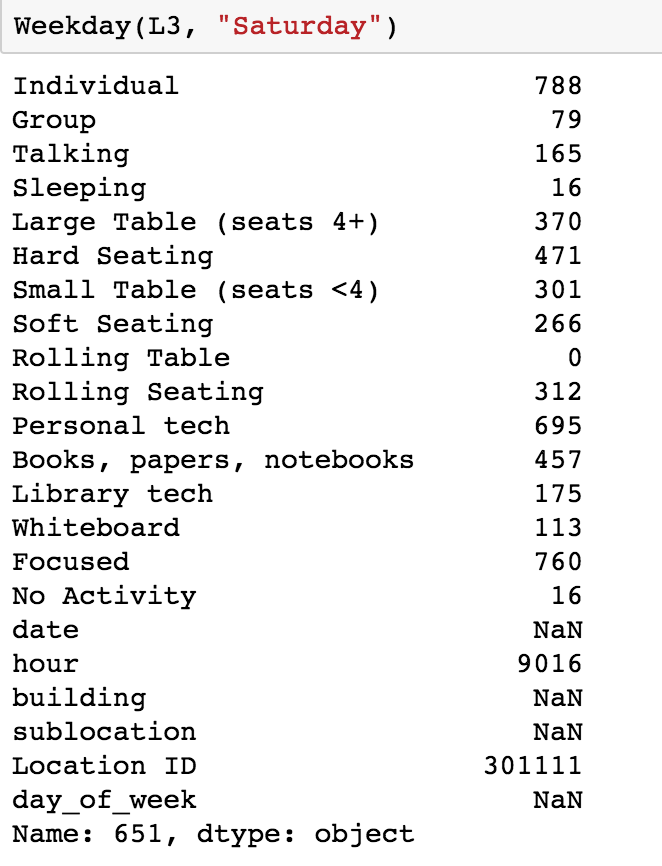

In [ ]:
# Calculate the tatal useage of specific library in specific weekday, input will be weekly dataset, libraryname and days


#for M4,M5,L3,H6,M7, run this
def M5LibraryWeekday(dataframes, library, days):
        f1 = dataframes.fillna(0)
        dataframe1 = f1[f1.day_of_week == days]
        dataframe2 = dataframe1[dataframe1.Building == library]
        fhardresult = dataframe2.append(dataframe2.sum(numeric_only=True), ignore_index=True)
        return fhardresult.iloc[-1]

#for L3, run this
def L3LibraryWeekday(dataframes, library, days):
        f1 = dataframes.fillna(0)
        dataframe1 = f1[f1.day_of_week == days]
        dataframe2 = dataframe1[dataframe1.building == library]
        fhardresult = dataframe2.append(dataframe2.sum(numeric_only=True), ignore_index=True)
        return fhardresult.iloc[-1] 

#H2, run this
def H2Lweekday(f1, library, days):
        f1 = f1.fillna('no')
        dataframe1 = f1[f1.day_of_week == days]
        dataframe2 = dataframe1[dataframe1.Building == library]
        a = Counter(dataframe2['Activity 1'])
        b = Counter(dataframe2['Activity 2'])
        c = Counter(dataframe2['Activity 3'])
        d = Counter(dataframe2['Activity 4'])
        e = Counter(dataframe2['Activity 5'])
        f = Counter(dataframe2['Activity 6'])
        h = Counter(dataframe2['Activity 8']) 
        i = Counter(dataframe2['Activity 9'])
        j = Counter(dataframe2['Activity 10'])
        k = Counter(dataframe2['Activity 11'])
        l = Counter(dataframe2['Activity 12']) 
        return a + b + c + d + e + f + h + i + j + k + l



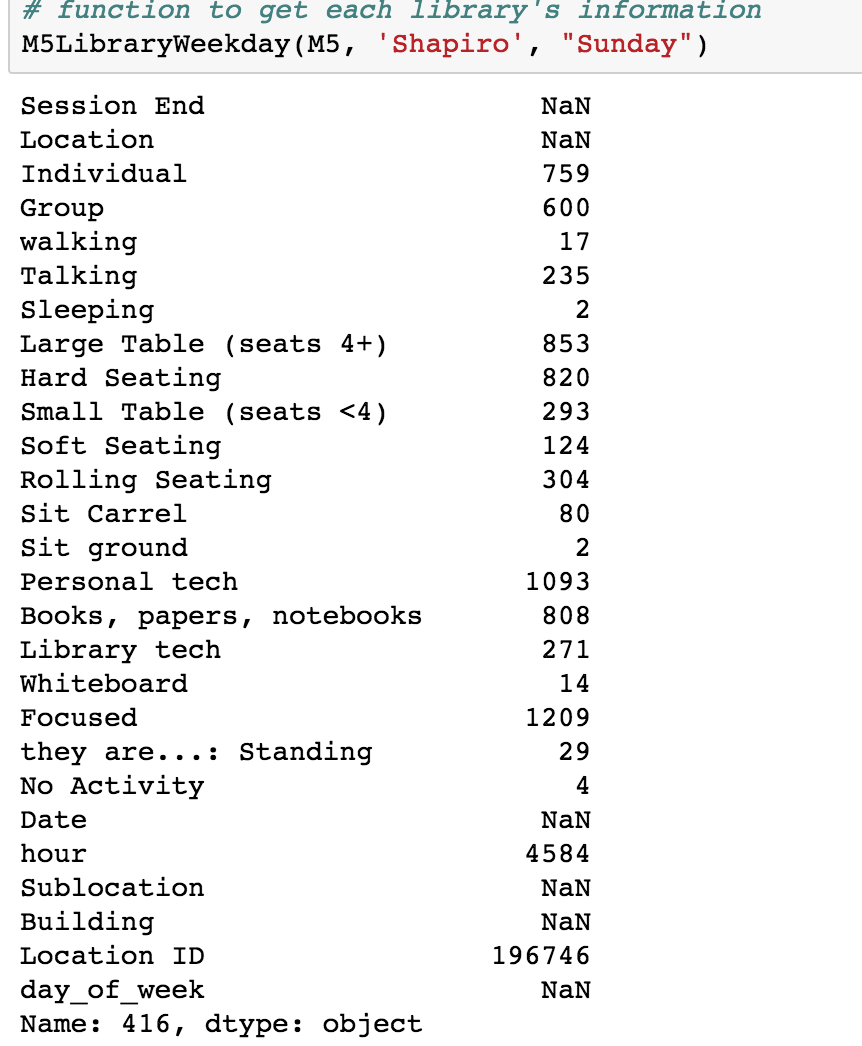

In [4]:
# Function for M5, M4, H6, L3

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
def testSeatpresentage(data,roomID,seating):
    won = []
    data1 = data[data['Location ID'] == roomID]
    for i in Weekday:
        days = data1[data1['day_of_week'] == i]
        hourlist = list(set(days['hour']))
        for a in hourlist:
            dayhour = days[days['hour'] == a]
            Result = dayhour.append(dayhour.sum(numeric_only=True), ignore_index=True)
            list1 = [i, a, Result.iloc[-1]['Rolling Seating']/int(seating),namestr(data, globals())[0],roomID]
            won.append(list1)
    df = pd.DataFrame(columns=['DayofWeek', 'Hour', 'Percentage of Full','Weeks','LocationID'])
    
    for a in won:   
        df = df.append(pd.DataFrame([a], columns=df.columns)).reset_index(drop=True)
    df.to_csv('PresentageOfOccupation ' + namestr(data, globals())[0]+ ' ' + str(roomID) + ' seating' '.csv', index = False)
            #won.append(i + " " + str(a) + " o'clock's occupation rate in Rolling Seat is " + str(Result.iloc[-1]['Rolling Seating']/int(vizhubs_Seat['Rolling'])))
    return df


SeatD = pd.read_csv('Seating by location - Duderstadt.csv')
Weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']


# Input: Week data, roomnumber, Seating data with rommnumber
# p.s if you want to run other library, please insert the library seating first, like SeatD
#example Du: 
testSeatpresentage(M4,499,SeatD[SeatD['ID'] == 499]
['Rolling']) 

DayofWeek Hour  Percentage of Full Weeks LocationID
0      Monday    8            0.000000    M4        499
1      Monday   11            0.421053    M4        499
2      Monday   14            0.328947    M4        499
3      Monday   17            0.473684    M4        499
4      Monday   20            0.592105    M4        499
5     Tuesday    0            0.368421    M4        499
6     Tuesday    2            0.105263    M4        499
7     Tuesday    5            0.026316    M4        499
8     Tuesday    8            0.000000    M4        499
9     Tuesday   11            0.289474    M4        499
10    Tuesday   14            0.434211    M4        499
11    Tuesday   17            1.131579    M4        499
12    Tuesday   20            0.394737    M4        499
13  Wednesday    0            0.000000    M4        499
14  Wednesday    2            0.065789    M4        499
15  Wednesday    4            0.000000    M4        499
16  Wednesday   11            0.460526    M4        499
17  Wednesday   14            0.657895    M4        499
18  Wednesday   17            0.210526    M4        499
19   Thursday    0            0.131579    M4        499
20   Thursday    3            0.000000    M4        499
21   Thursday    5            0.013158    M4        499
22   Thursday    8            0.026316    M4        499
23   Thursday   11            0.552632    M4        499
24   Thursday   14            0.473684    M4        499
25   Thursday   17            0.000000    M4        499
26   Thursday   20            0.473684    M4        499
27     Friday    0            0.000000    M4        499
28     Friday    3            0.000000    M4        499
29     Friday    5            0.026316    M4        499
30     Friday    8            0.000000    M4        499
31     Friday   11            0.210526    M4        499
32     Friday   14            0.605263    M4        499
33     Friday   17            0.000000    M4        499
34     Friday   20            0.197368    M4        499
35     Friday   22            0.000000    M4        499
36   Saturday    1            0.000000    M4        499
37   Saturday   12            0.486842    M4        499
38   Saturday   14            0.315789    M4        499
39   Saturday   18            0.302632    M4        499
40   Saturday   20            0.328947    M4        499
41   Saturday   22            0.000000    M4        499
42     Sunday    3            0.013158    M4        499
43     Sunday   11            0.197368    M4        499
44     Sunday    4            0.000000    M4        499
45     Sunday   14            0.631579    M4        499

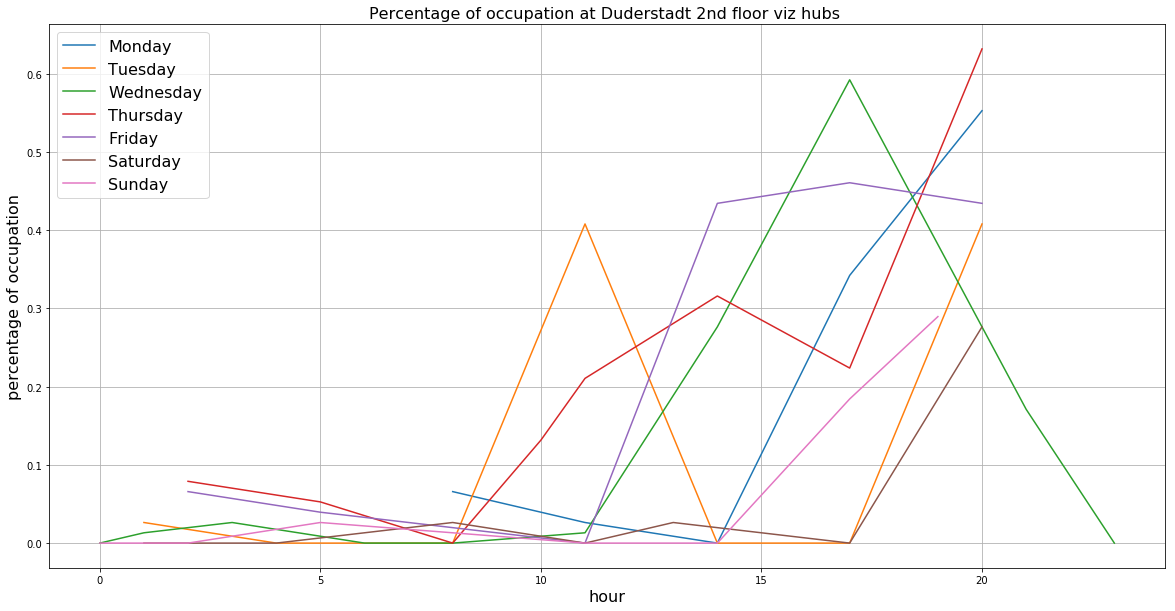

In [11]:
#continue
#create percentage of full for the whole week for this specific room
Weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
data1 = pd.read_csv('PresentageOfOccupation_D_vizhubs1.csv')


from pylab import *
plt.figure(figsize=(20,10))
for i in Weekday:
    df = data1[data1['DayofWeek'] == i]
    t = df['Hour']
    s = df['Percentage of Full']
    plot(t, s)
 
xlabel('hour', fontsize = 16)
ylabel('percentage of occupation',fontsize = 16)
title('Percentage of occupation at Duderstadt 2nd floor viz hubs ', fontsize = 16)
plt.legend(Weekday, loc='upper left', fontsize = 16)
grid(True)
show()


In [14]:
# Example, Du Library, average percentage of occupation from high to low
# import weekday
def DuBuildingOccupation(data):
    lo = data[data['Building'] == 'Duderstadt']
    locationID = list(set(lo['Location ID']))
    Sdu1 = Sdu.fillna(0)
    list1= []
    for a in locationID: 
        IDtest  = lo[lo['Location ID'] == a]
        Sessionlist = list(set(IDtest['Session End']))
        s = Sdu1[Sdu1['ID'] == a]
        try:
            totalseat = int(s.iloc[0]['Total'])#.astype(str).astype(int)
            ave = []
            for i in Sessionlist: 
                Sessiontest = IDtest[IDtest['Session End'] == i]
                result = Sessiontest.append(Sessiontest.sum(numeric_only=True), ignore_index=True)
                totaloc =result.iloc[-1]['Individual'] + result.iloc[-1]['Group']
                ave.append(totaloc)
                aveSeat = sum(ave)/len(ave)
            oc = aveSeat/totalseat
            listlist = ['Duderstadt',result['Sublocation'],a,oc, namestr(data, globals())[0]]
            list1.append(listlist)
            df = pd.DataFrame(columns=['Building','Sublocation','LocationID', 'Percentage of Occupation', 'week' ])
            for w in list1:
                df = df.append(pd.DataFrame([w], columns=df.columns)).reset_index(drop=True)
        except:
            pass
    af = df.sort_values(by='Percentage of Occupation', ascending=False)
    return af

In [17]:
DuBuildingOccupation(M7)

Building                                        Sublocation  LocationID  \
0   Duderstadt  0    3: Walkway 
1    3: Walkway 
2    3: Walk...       493.0   
6   Duderstadt  0    2: Lab 
1    2: Lab 
2        NaN
Name: S...       500.0   
8   Duderstadt  0    2: Study Area 2400 
1    2: Study Area 24...       503.0   
3   Duderstadt  0     3: Lab 3400 
1     3: Lab 3400 
2     3:...       497.0   
1   Duderstadt  0    3: Study Area 
1    3: Study Area 
2    3...       494.0   
10  Duderstadt  0    B: Walkway 
1            NaN
Name: Subloc...       506.0   
4   Duderstadt  0     2: Study Area 2450 
1     2: Study Area ...       498.0   
2   Duderstadt  0     3: Lab 3200 
1     3: Lab 3200 
2     3:...       496.0   
7   Duderstadt  0    2: Walkway 
1            NaN
Name: Subloc...       501.0   
5   Duderstadt  0     2: Lab VizHub 
1     2: Lab VizHub 
2   ...       499.0   
11  Duderstadt  0    B: Study Room 
1               NaN
Name: ...       507.0   
9   Duderstadt  0    1: Study Area 
1               NaN
Name: ...       505.0   
12  Duderstadt  0    B: Study Area 
1    B: Study Area 
2    B...       508.0   

    Percentage of Occupation week  
0                   0.607143   M7  
6                   0.460571   M7  
8                   0.438519   M7  
3                   0.408626   M7  
1                   0.390572   M7  
10                  0.388889   M7  
4                   0.360965   M7  
2                   0.344209   M7  
7                   0.328502   M7  
5                   0.274781   M7  
11                  0.204861   M7  
9                   0.197840   M7  
12                  0.175576   M7